# Analyse des NSL-KDD-Datensatzes: Eine umfassende Untersuchung des Intrusion Detection Systems

## Einführung

Im Bereich der Cybersicherheit und der Erkennung von Netzwerkangriffen gilt der NSL-KDD-Datensatz als Benchmark zur Bewertung der Leistung von Machine-Learning-Modellen. Dieser Datensatz, der aus dem ursprünglichen KDD Cup 1999-Datensatz abgeleitet wurde, behebt die Einschränkungen und Verzerrungen seines Vorgängers und ist damit eine wichtige Ressource für Forscher und Praktiker im Bereich des Intrusion Detection Systems (IDS).

Dieses Notebook unternimmt eine umfassende Untersuchung des NSL-KDD-Datensatzes mit dem Fokus auf den Aufbau und die Bewertung von Machine-Learning-Modellen zur Erkennung von Netzwerkangriffen. Die Hauptziele dieses Projekts umfassen:

1. **Importieren von Bibliotheken:** Wichtige Python-Bibliotheken wie pandas, numpy, matplotlib, seaborn und scikit-learn werden importiert, um die Datenbearbeitung, Visualisierung und Modellentwicklung zu erleichtern.

2. **Einlesen des Datensatzes:** Der NSL-KDD-Datensatz wird in die Umgebung geladen und bildet die Grundlage für nachfolgende Analysen und Modellentwicklungen.

3. **Datenbereinigung:** Datenbereinigungsoperationen beheben fehlende Werte, behandeln Ausreißer und stellen die Integrität des Datensatzes sicher, um ihn für die explorative Datenanalyse (EDA) und die Vorverarbeitung vorzubereiten.

4. **EDA und Visualisierung:** Explorative Datenanalyse und Visualisierungstechniken bieten Einblicke in die Struktur des Datensatzes, die Merkmalsverteilung, Korrelationen und potenzielle Muster. Dies unterstützt das Verständnis des Netzwerkverkehrs und des Angriffsverhaltens.

5. **Vorverarbeitung:** Vorverarbeitungstechniken wie Merkmals-Skalierung, Kodierung kategorialer Variablen und Datenumwandlung bereiten den Datensatz für das Training von Modellen vor und stellen die Kompatibilität mit Machine-Learning-Algorithmen sicher.

6. **Feature Engineering:** Strategien zur Merkmalsentwicklung schaffen neue Merkmale, extrahieren relevante Informationen und verbessern die Vorhersagekraft. Dies optimiert den Datensatz für die Analyse der Angriffserkennung.

7. **Modellentwicklung:** 
   - **XGBoost (XGB):** XGBoost wird als leistungsstarker Gradient-Boosting-Algorithmus eingesetzt, der für seine hohe Leistung bei Klassifizierungsaufgaben bekannt ist. Seine Fähigkeit, komplexe Beziehungen und große Datensätze zu bewältigen, macht ihn zu einem wertvollen Werkzeug für die Erkennung von Netzwerkangriffen.
   - **Logistische Regression:** Logistische Regression wird aufgrund ihrer Einfachheit und Interpretierbarkeit als effektives Basismodell für binäre Klassifizierungsaufgaben verwendet. Sie bietet Einblicke in die linearen Beziehungen zwischen Merkmalen und der Zielvariablen und unterstützt das Verständnis von Angriffsmustern.

8. **Bewertung:** Bewertungsmetriken wie Genauigkeit, Präzision, Recall, F1-Score und die Fläche unter der Receiver Operating Characteristic-Kurve (AUC-ROC) liefern Einblicke in die Leistung der Modelle und ihre Wirksamkeit bei der Erkennung von Netzwerkangriffen.

9. **Merkmalsbedeutung:** Die Analyse der Merkmalsbedeutung identifiziert Schlüsselmerkmale, die zur Erkennung von Angriffen beitragen, priorisiert diese und verbessert die Interpretierbarkeit der Modelle.

10. **Ergebnisse:** Die Analyse stellt die Stärken und Schwächen verschiedener Machine-Learning-Modelle dar, diskutiert gewonnene Erkenntnisse und gibt Empfehlungen zur Verbesserung der Strategien zur Erkennung von Netzwerkangriffen.

Diese Untersuchung des NSL-KDD-Datensatzes navigiert durch die Komplexität der Erkennung von Netzwerkangriffen und nutzt Machine-Learning-Techniken, um die Verteidigung gegen Cyber-Bedrohungen zu stärken.
# 1. BIBLIOTHEKEN IMPORTIEREN

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.rcParams["figure.figsize"] = (10,6)

# 2. DATENSATZ LESEN

In [5]:
df_0 = pd.read_csv("/kaggle/input/nslkdd/KDDTrain+.txt")
df= df_0.copy()
df.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.000,0.600,0.880,0.000,0.000,0.000,0.000,0.000,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.100,0.050,0.000,0.000,1.000,1.000,0.000,0.000,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.000,0.000,0.030,0.040,0.030,0.010,0.000,0.010,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.070,0.070,0.000,0.000,0.000,0.000,1.000,1.000,neptune,21


# 2.1 SPALTEN ANPASSEN

In [6]:
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

Wir haben die Namen der Features aus dem angegebenen Datensatz nicht, also passe ich die Spalten von hier an: https://www.kaggle.com/code/timgoodfellow/nsl-kdd-explorations

# 2.2 ERKENNTNISSE

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125972 entries, 0 to 125971
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125972 non-null  int64  
 1   protocol_type                125972 non-null  object 
 2   service                      125972 non-null  object 
 3   flag                         125972 non-null  object 
 4   src_bytes                    125972 non-null  int64  
 5   dst_bytes                    125972 non-null  int64  
 6   land                         125972 non-null  int64  
 7   wrong_fragment               125972 non-null  int64  
 8   urgent                       125972 non-null  int64  
 9   hot                          125972 non-null  int64  
 10  num_failed_logins            125972 non-null  int64  
 11  logged_in                    125972 non-null  int64  
 12  num_compromised              125972 non-null  int64  
 13 

In [8]:
df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
count,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,...,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000,125972.000
mean,287.147,45567.101,19779.271,0.000,0.023,0.000,0.204,0.001,0.396,0.279,...,115.654,0.521,0.083,0.148,0.033,0.284,0.278,0.119,0.120,19.504
std,2604.526,5870354.481,4021285.112,0.014,0.254,0.014,2.150,0.045,0.489,23.942,...,110.703,0.449,0.189,0.309,0.113,0.445,0.446,0.307,0.319,2.292
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,10.000,0.050,0.000,0.000,0.000,0.000,0.000,0.000,0.000,18.000
50%,0.000,44.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,63.000,0.510,0.020,0.000,0.000,0.000,0.000,0.000,0.000,20.000
75%,0.000,276.000,516.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,...,255.000,1.000,0.070,0.060,0.020,1.000,1.000,0.000,0.000,21.000
max,42908.000,1379963888.000,1309937401.000,1.000,3.000,3.000,77.000,5.000,1.000,7479.000,...,255.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,21.000


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125972.000,287.147,2604.526,0.000,0.000,0.000,0.000,42908.000
src_bytes,125972.000,45567.101,5870354.481,0.000,0.000,44.000,276.000,1379963888.000
dst_bytes,125972.000,19779.271,4021285.112,0.000,0.000,0.000,516.000,1309937401.000
land,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,1.000
wrong_fragment,125972.000,0.023,0.254,0.000,0.000,0.000,0.000,3.000
urgent,125972.000,0.000,0.014,0.000,0.000,0.000,0.000,3.000
hot,125972.000,0.204,2.150,0.000,0.000,0.000,0.000,77.000
num_failed_logins,125972.000,0.001,0.045,0.000,0.000,0.000,0.000,5.000
logged_in,125972.000,0.396,0.489,0.000,0.000,0.000,1.000,1.000
num_compromised,125972.000,0.279,23.942,0.000,0.000,0.000,0.000,7479.000


# 3. DATENBEREINIGUNG

# 3.1 NULLWERTE

In [10]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [11]:
#helper function for deeper analysis
def unique_values(df, columns):
    """Prints unique values and their counts for specific columns in the DataFrame."""

    for column_name in columns:
        print(f"Column: {column_name}\n{'-'*30}")
        unique_vals = df[column_name].unique()
        value_counts = df[column_name].value_counts()
        print(f"Unique Values ({len(unique_vals)}): {unique_vals}\n")
        print(f"Value Counts:\n{value_counts}\n{'='*40}\n")

In [12]:
cat_features = df.select_dtypes(include='object').columns
unique_values(df, cat_features)

Column: protocol_type
------------------------------
Unique Values (3): ['udp' 'tcp' 'icmp']

Value Counts:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64

Column: service
------------------------------
Unique Values (70): ['other' 'private' 'http' 'remote_job' 'ftp_data' 'name' 'netbios_ns'
 'eco_i' 'mtp' 'telnet' 'finger' 'domain_u' 'supdup' 'uucp_path' 'Z39_50'
 'smtp' 'csnet_ns' 'uucp' 'netbios_dgm' 'urp_i' 'auth' 'domain' 'ftp'
 'bgp' 'ldap' 'ecr_i' 'gopher' 'vmnet' 'systat' 'http_443' 'efs' 'whois'
 'imap4' 'iso_tsap' 'echo' 'klogin' 'link' 'sunrpc' 'login' 'kshell'
 'sql_net' 'time' 'hostnames' 'exec' 'ntp_u' 'discard' 'nntp' 'courier'
 'ctf' 'ssh' 'daytime' 'shell' 'netstat' 'pop_3' 'nnsp' 'IRC' 'pop_2'
 'printer' 'tim_i' 'pm_dump' 'red_i' 'netbios_ssn' 'rje' 'X11' 'urh_i'
 'http_8001' 'aol' 'http_2784' 'tftp_u' 'harvest']

Value Counts:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
 

# 3.2 DUPLIKATE

In [13]:
df.duplicated().sum()

0

# 3.3 Ausreißer

In [14]:
df.shape

(125972, 43)

<Figure size 2000x4000 with 0 Axes>

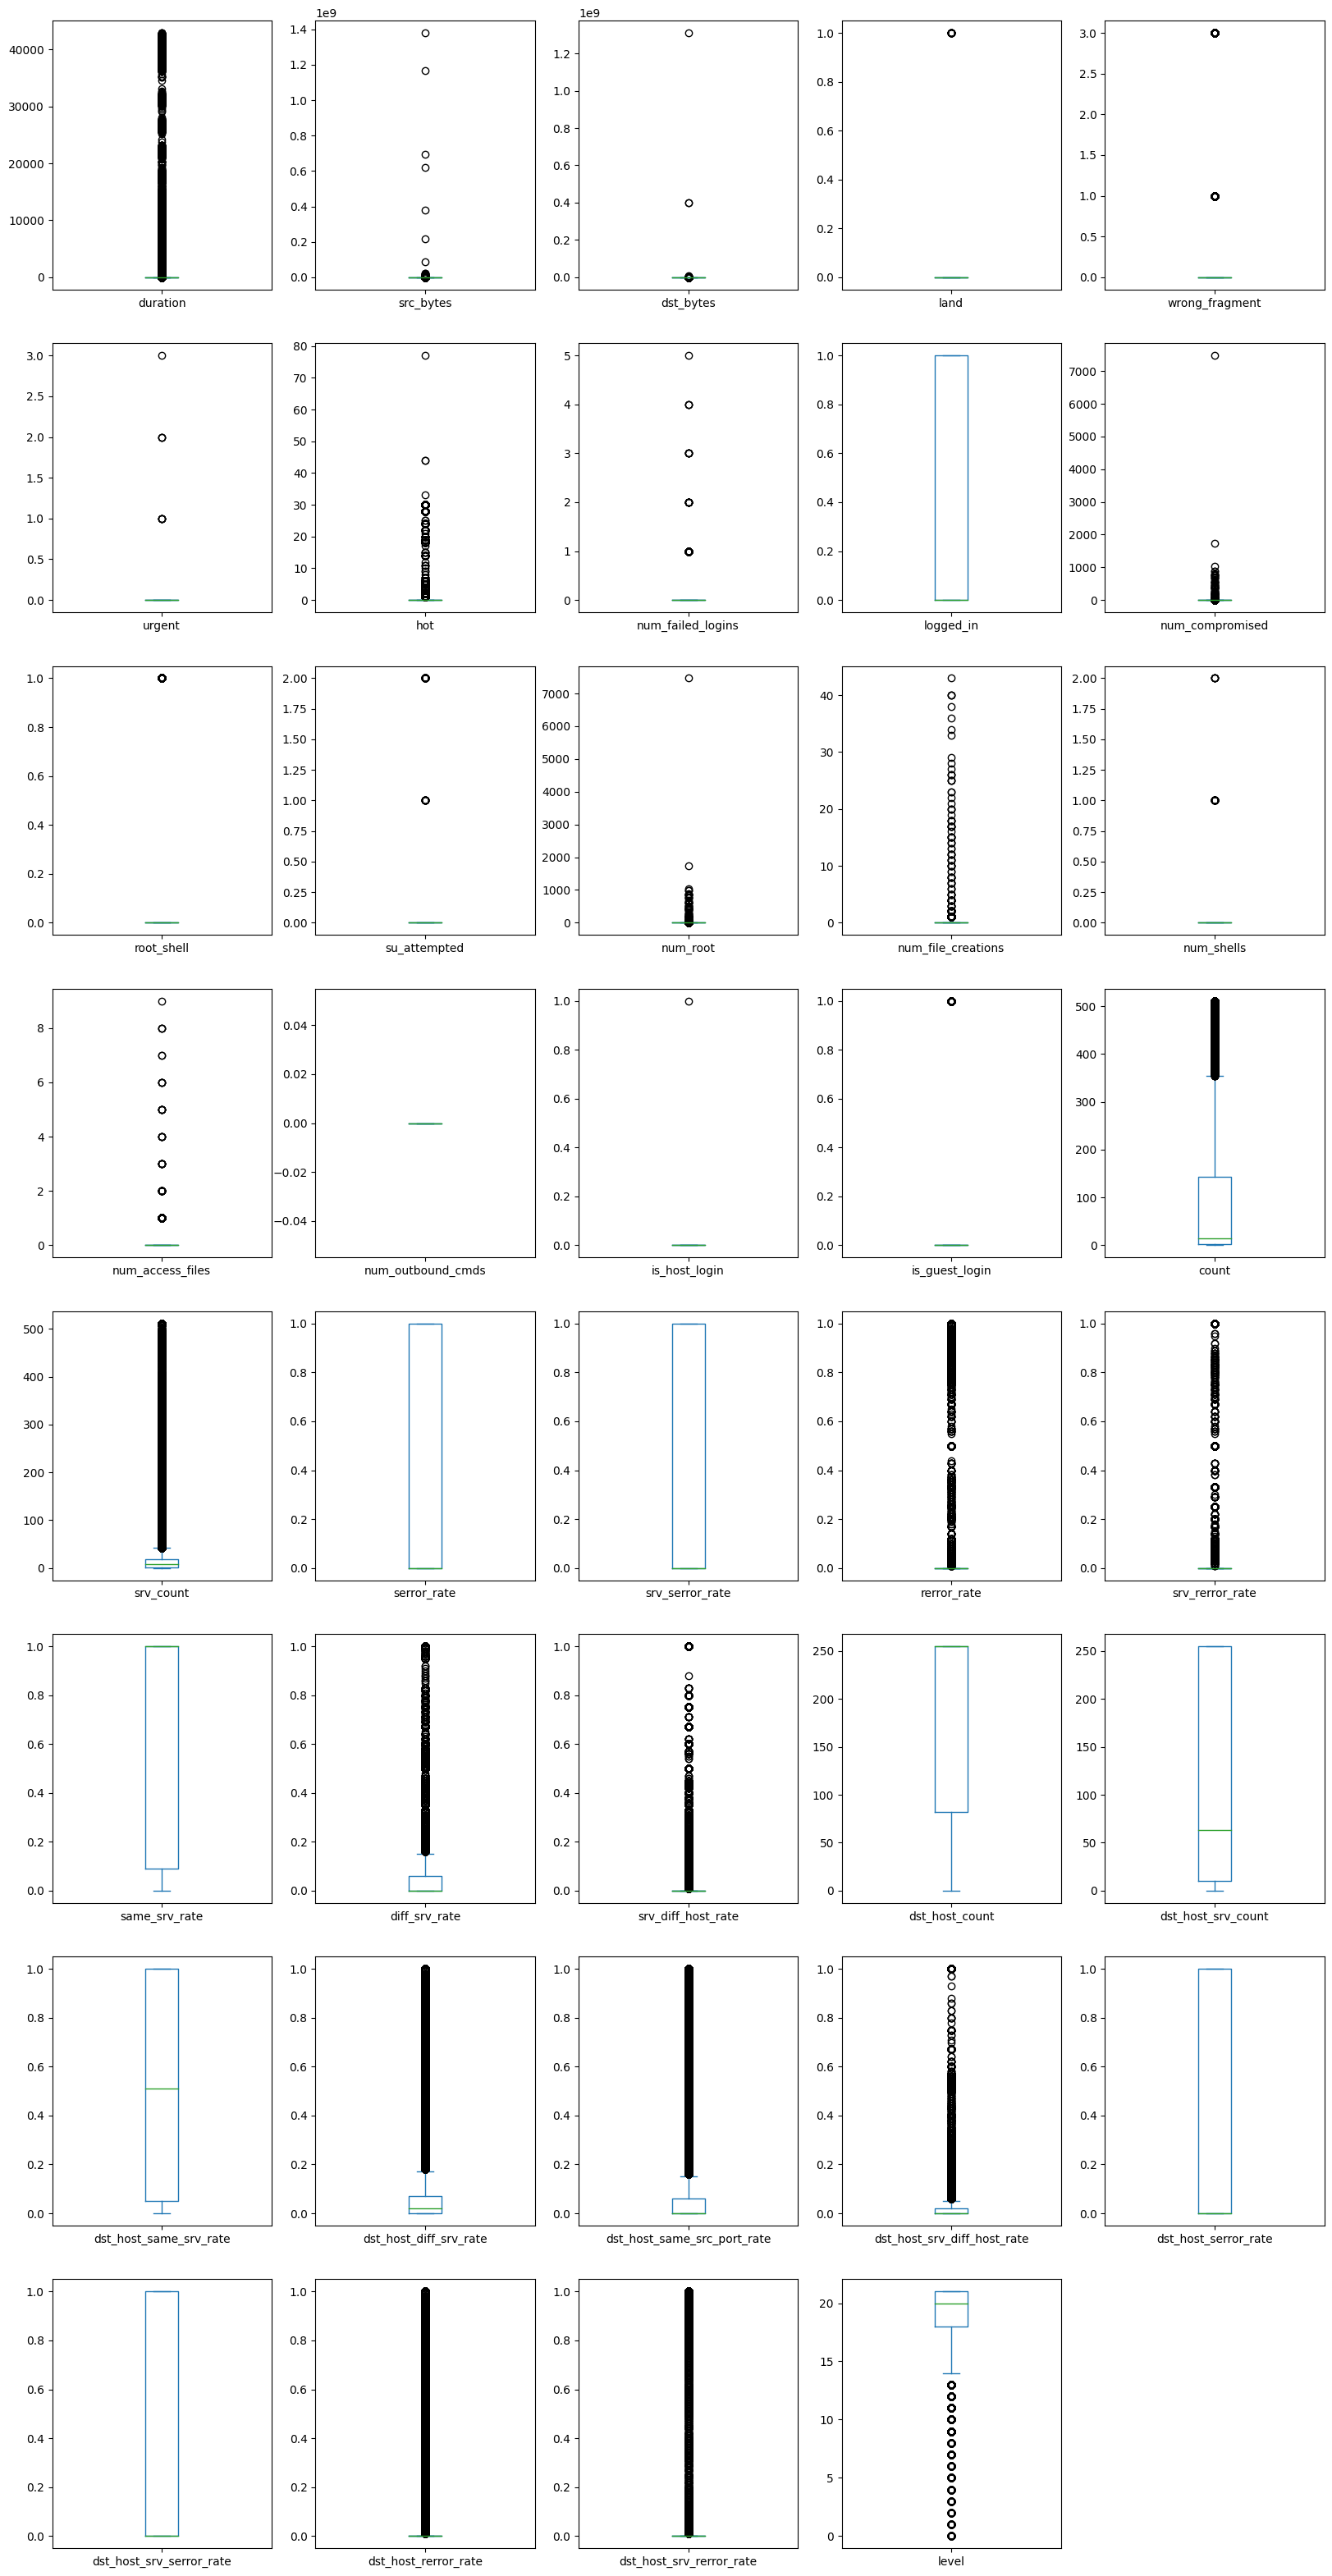

In [15]:
plt.figure(figsize=(20, 40))
df.plot(kind='box', subplots=True, layout=(8, 5), figsize=(20, 40))
plt.show()

# 3.4 Angriff klassifizieren oder nicht

In [16]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n 

In [17]:
df['attack'].unique()

array(['normal', 'attack'], dtype=object)

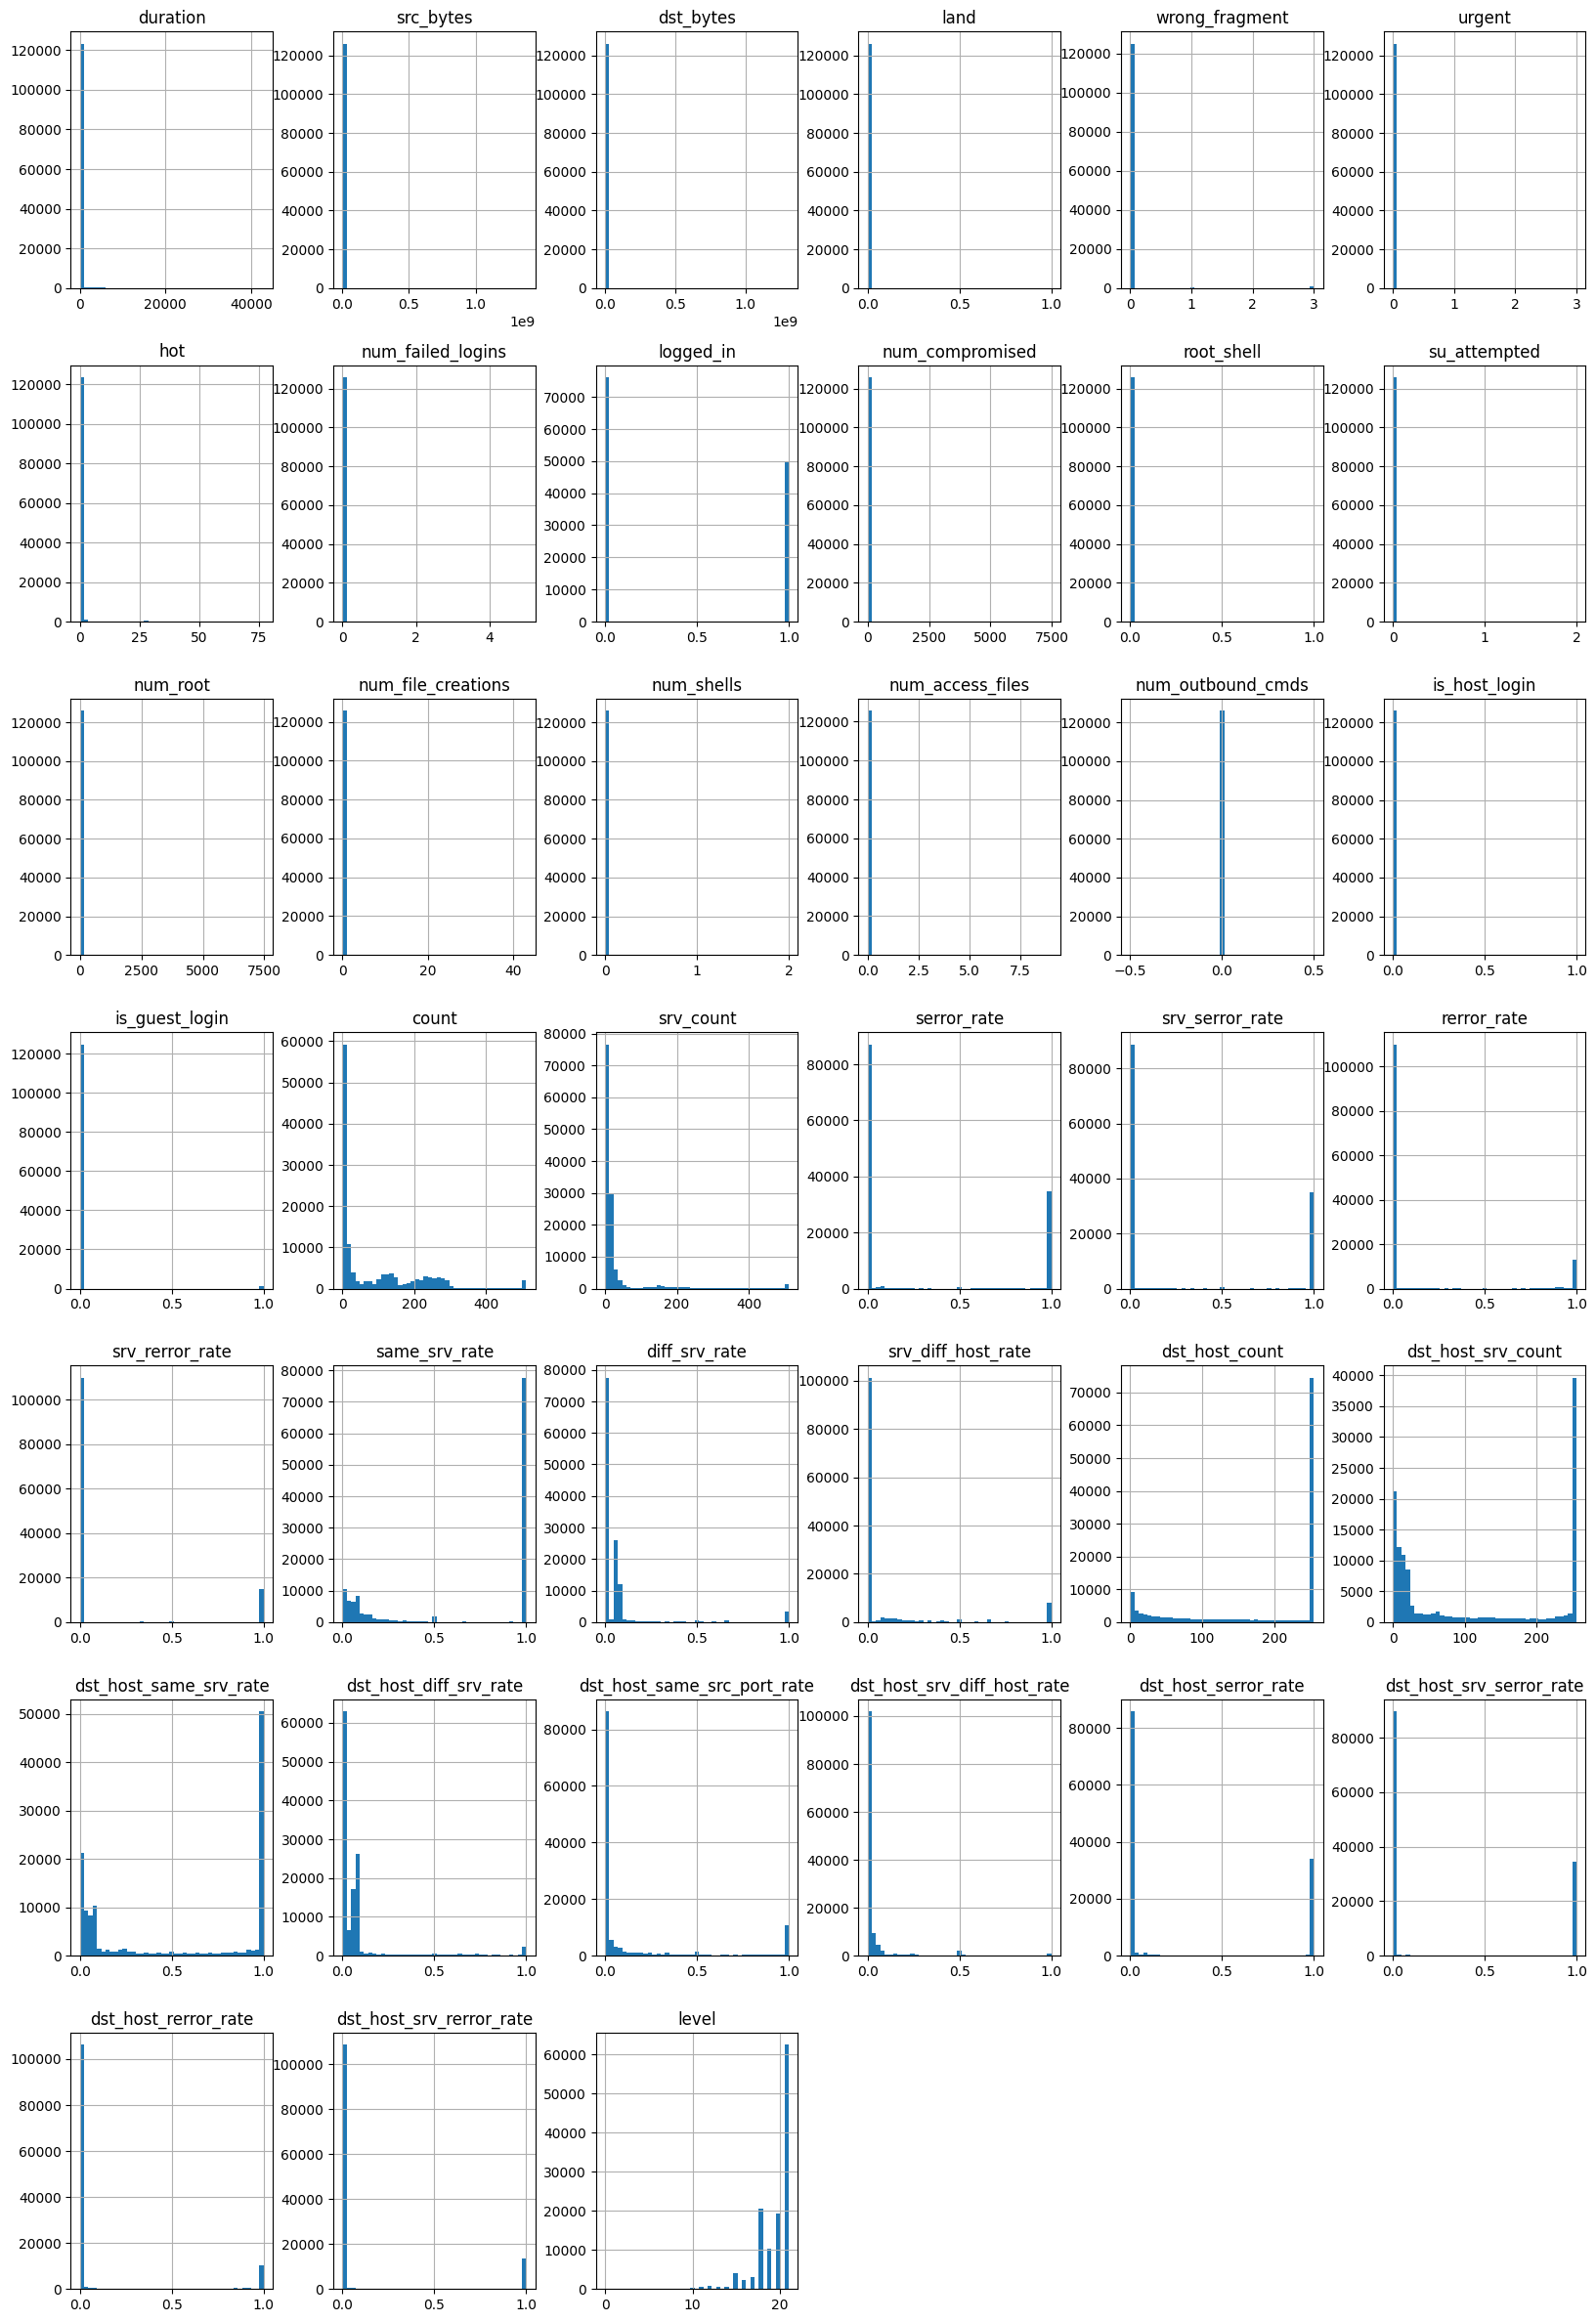

In [18]:
df.hist(bins=43,figsize=(20,30));

# 4.1 Protokolltyp

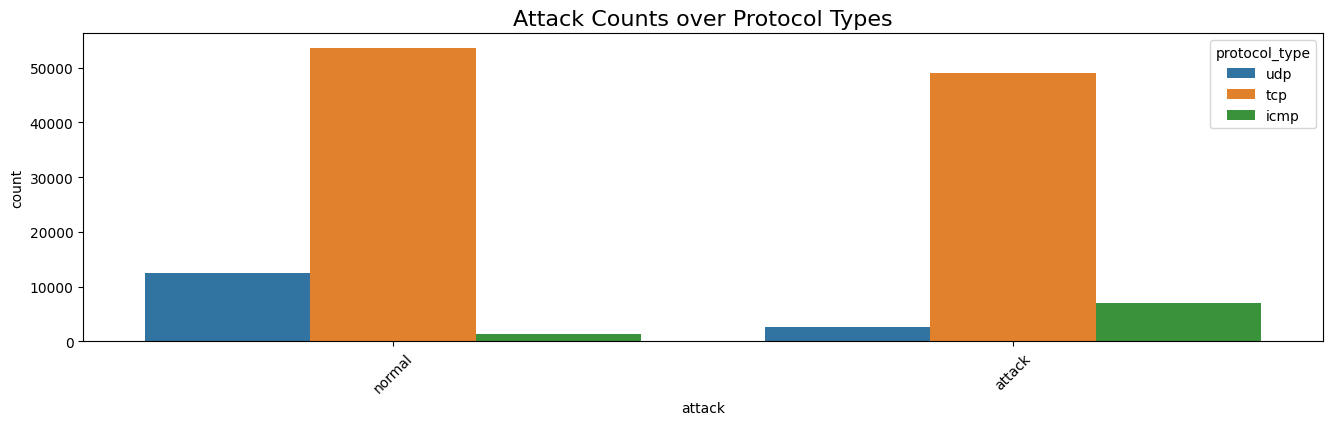

In [19]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

In [20]:
df["protocol_type"].value_counts(normalize=True)

protocol_type
tcp    0.815
udp    0.119
icmp   0.066
Name: proportion, dtype: float64

# 4.2 Genutzte Dienste allgemein

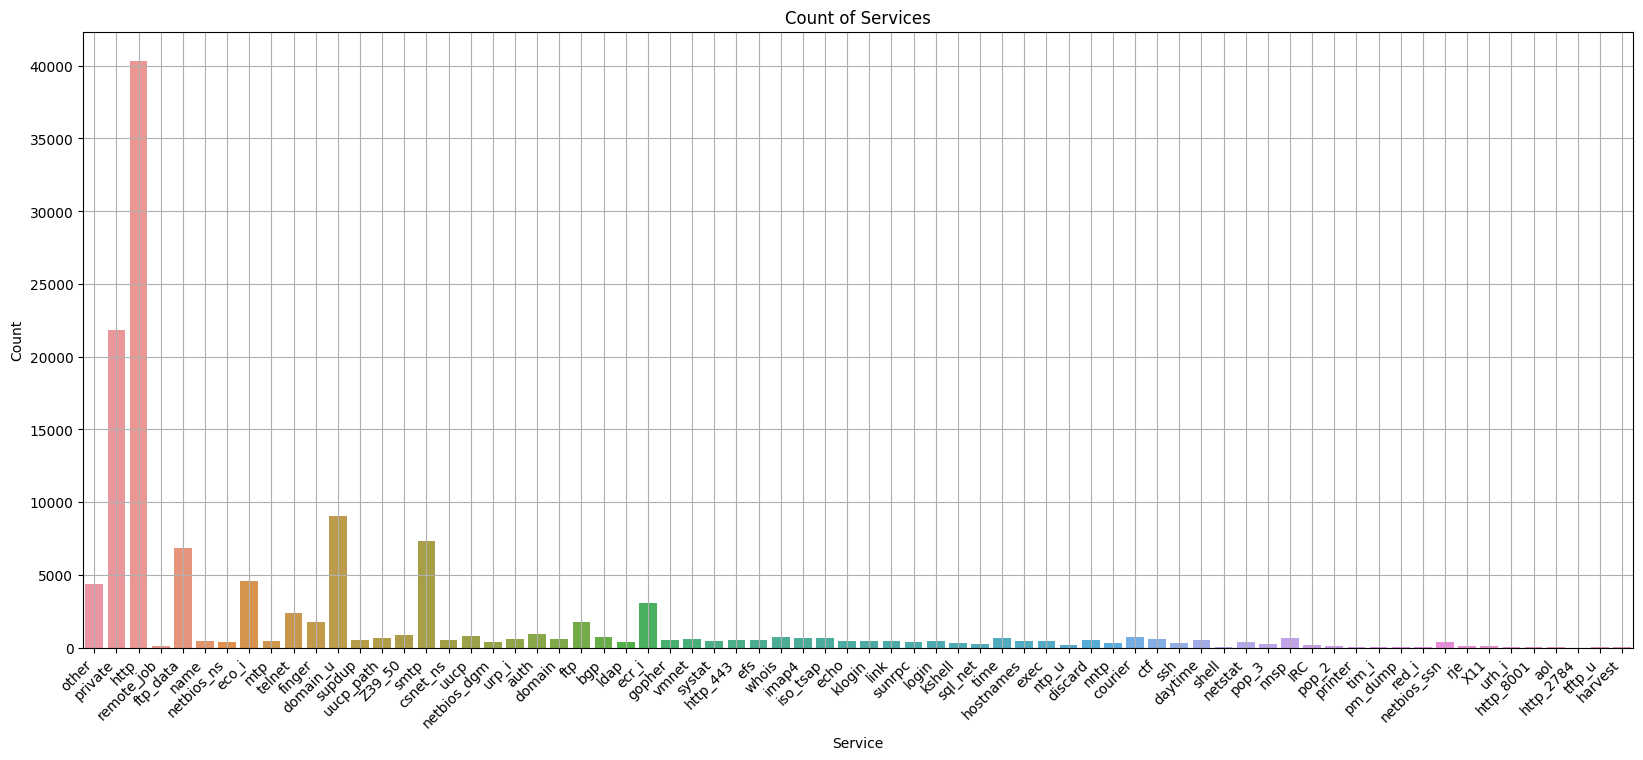

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

# 4.3 Auswirkung des genutzten Dienstes auf Angriffe

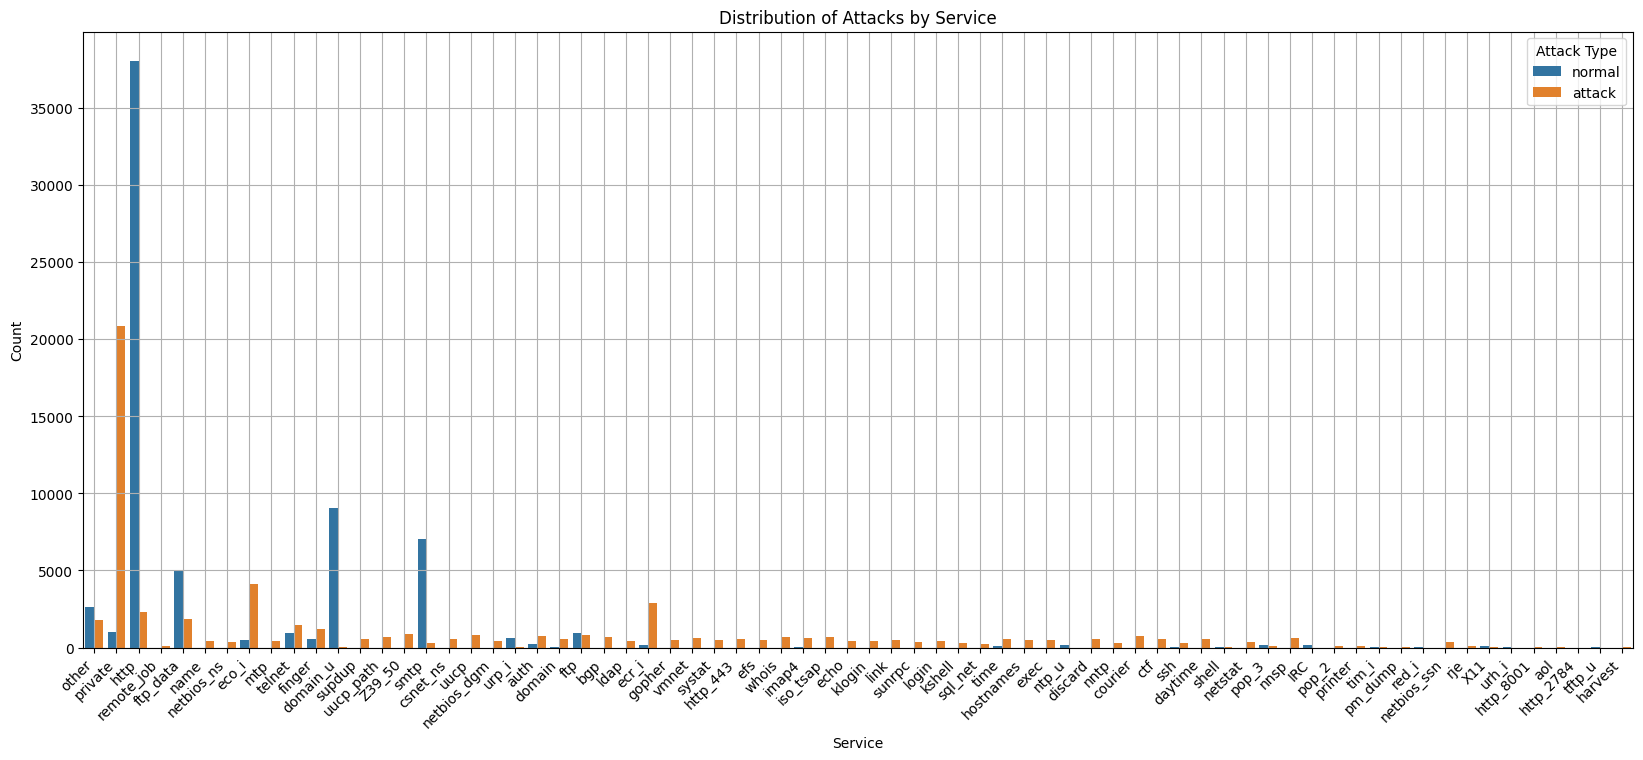

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# 4.4 Kernel Density Estimate (KDE) Diagramm der Dauer nach Flagge

<Figure size 1200x800 with 0 Axes>

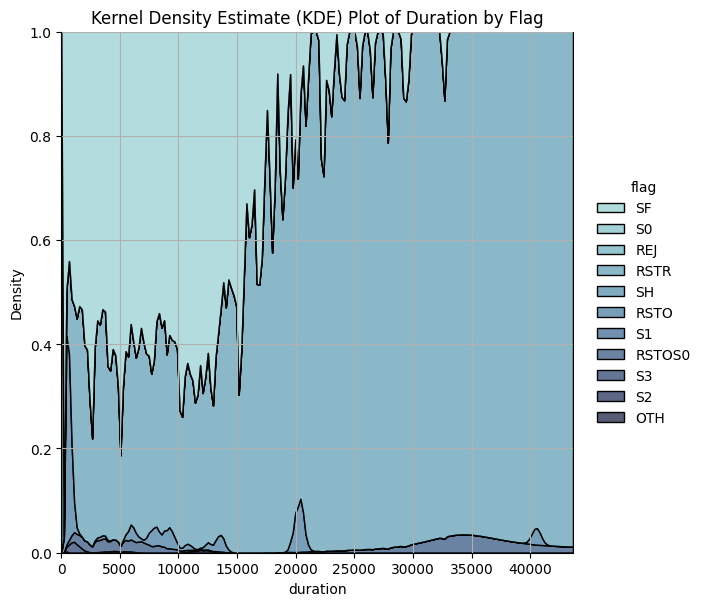

In [23]:

plt.figure(figsize=(12, 8))
sns.displot(
    data=df,
    x="duration",
    hue="flag",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)
plt.title('Kernel Density Estimate (KDE) Plot of Duration by Flag')
plt.grid(True)
plt.show()

# 4.5 Verteilung der Angriffsarten nach Gastanmeldung

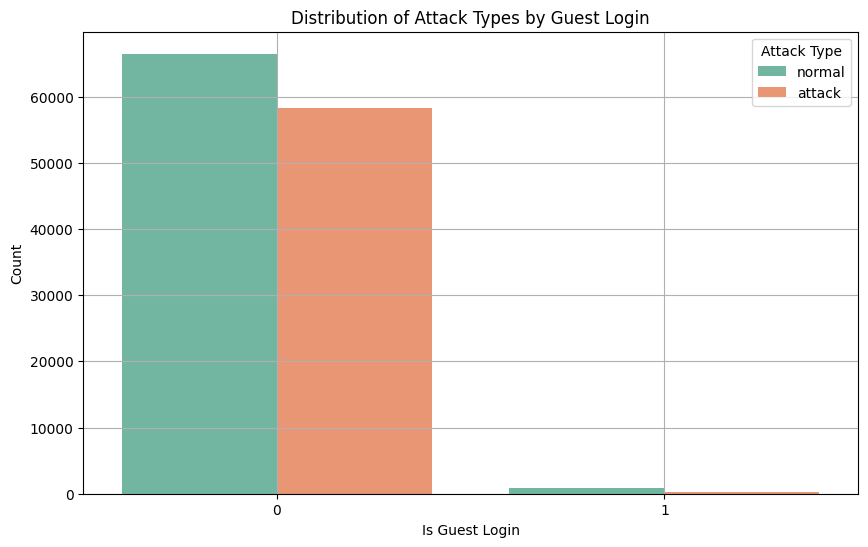

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

# 5. DATA VORVERARBEITUNG

# 5.1 KODIERUNG

In [25]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

In [26]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x]=le.fit_transform(df[x])

# 5.2 TRAIN-TEST-SPLIT

In [27]:
from sklearn.model_selection import train_test_split

X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1,random_state=43) 

In [28]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

# 5.3 Feature-Engineering

In [29]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

src_bytes                     0.567
service                       0.468
dst_bytes                     0.440
same_srv_rate                 0.369
flag                          0.368
diff_srv_rate                 0.361
dst_host_srv_count            0.336
dst_host_same_srv_rate        0.311
logged_in                     0.293
dst_host_serror_rate          0.288
dst_host_diff_srv_rate        0.286
dst_host_srv_serror_rate      0.282
serror_rate                   0.278
srv_serror_rate               0.267
count                         0.265
dst_host_srv_diff_host_rate   0.188
level                         0.152
dst_host_count                0.145
dst_host_same_src_port_rate   0.129
srv_diff_host_rate            0.100
srv_count                     0.063
dst_host_srv_rerror_rate      0.060
protocol_type                 0.054
rerror_rate                   0.040
dst_host_rerror_rate          0.036
srv_rerror_rate               0.034
duration                      0.024
hot                         

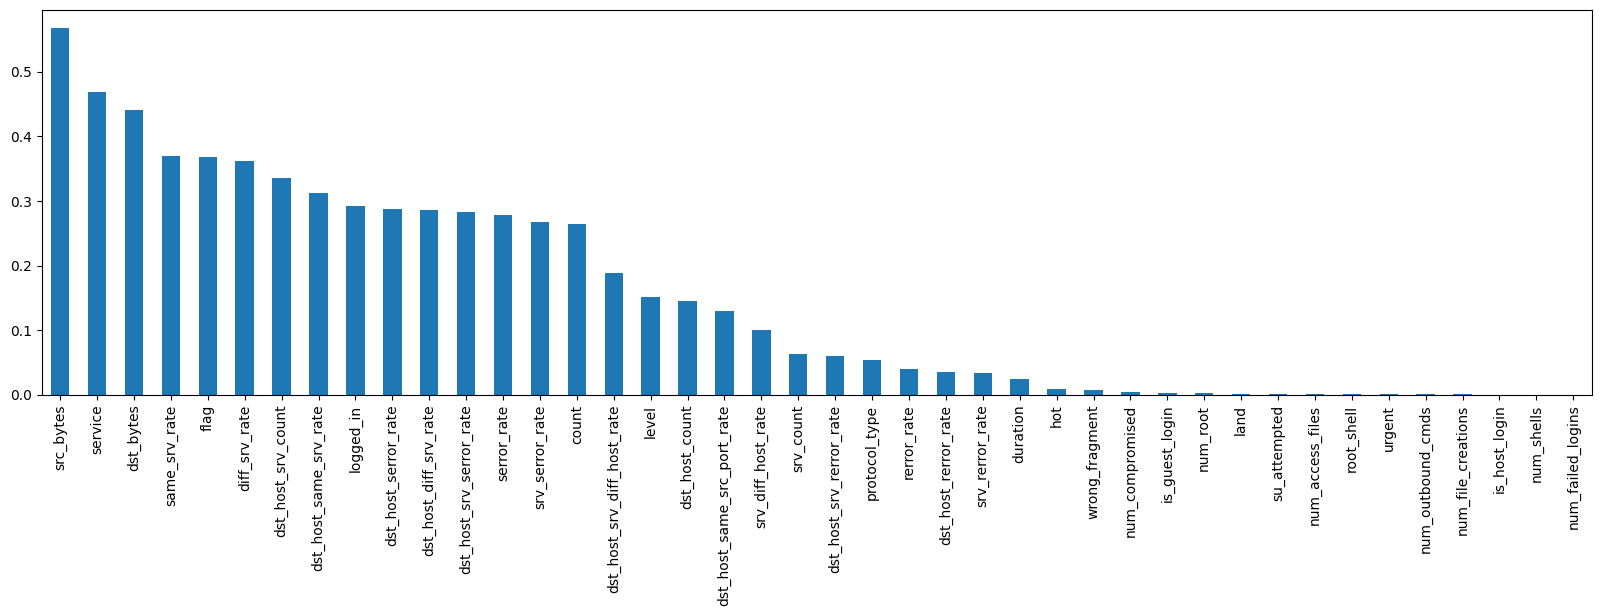

In [30]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

# 5.4 Featureauswahl

In [31]:
from sklearn.feature_selection import SelectKBest
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [32]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

# 5.5 Skalierung

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

# 6. MODELLBAU

In [34]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [35]:
XGBoost_model = XGBClassifier(random_state = 42)
Logistic_model = LogisticRegression(random_state=42)

In [36]:
XGBoost = XGBoost_model.fit(X_train,y_train)

In [37]:
Logistic = Logistic_model.fit(X_train,y_train)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [39]:
#it's a helper function in order to evaluate our model if it's overfit or underfit.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [40]:
eval_metric(Logistic_model, X_train, y_train, X_test, y_test)

Test_Set
[[5421  407]
 [ 233 6537]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.94      5828
           1       0.94      0.97      0.95      6770

    accuracy                           0.95     12598
   macro avg       0.95      0.95      0.95     12598
weighted avg       0.95      0.95      0.95     12598


Train_Set
[[49317  3485]
 [ 2141 58431]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     52802
           1       0.94      0.96      0.95     60572

    accuracy                           0.95    113374
   macro avg       0.95      0.95      0.95    113374
weighted avg       0.95      0.95      0.95    113374



In [41]:
eval_metric(XGBoost_model, X_train, y_train, X_test, y_test)

Test_Set
[[5816   12]
 [   8 6762]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52746    56]
 [   29 60543]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



Wir können also sehen, dass Ensemble-Methoden wie xgboost, adaboost, gradientboosts in größeren Datensätzen höhere Genauigkeitswerte erzielen als die logistische Regression.

Es ist nicht notwendig, aber wir werden Hyperparameter-Tuning durchführen, um das Modell mit den besten Parametern anzupassen. Ich möchte daran erinnern, dass xgboost selbst über eine Kreuzvalidierung verfügt

# 6.1 HYPERPARAMETER-TUNING

In [42]:
param_grid = {
    "n_estimators": [50,64,100,128],
    "max_depth": [2, 3, 4,5,6],
    "learning_rate": [0.01,0,0.03, 0.05, 0.1],
    "subsample": [0.5, 0.8],
    "colsample_bytree": [0.5, 0.8]
}

In [43]:
from sklearn.model_selection import GridSearchCV

XGB_model = XGBClassifier(random_state=42) #initialize the model

XGB_grid_model = GridSearchCV(XGB_model,
                        param_grid,
                        scoring="f1",
                        n_jobs=-1,
                        return_train_score=True).fit(X_train, y_train)

In [44]:
XGB_grid_model.best_score_

0.9983422219898579

In [45]:
XGB_grid_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 6,
 'n_estimators': 128,
 'subsample': 0.8}

# 6.2 ENDGÜLTIGES MODELL

In [46]:
XGB_model = XGBClassifier(
    colsample_bytree=0.5,
    learning_rate=0.1,
    max_depth=6,
    n_estimators=128,
    subsample=0.8
)

# Fit the classifier to your data
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=128, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# 6.3 BEWERTUNG

In [47]:
y_pred = XGB_model.predict(X_test)
y_pred_proba = XGB_model.predict_proba(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba[:,1])

In [48]:
xgb_auc

0.99997736694144

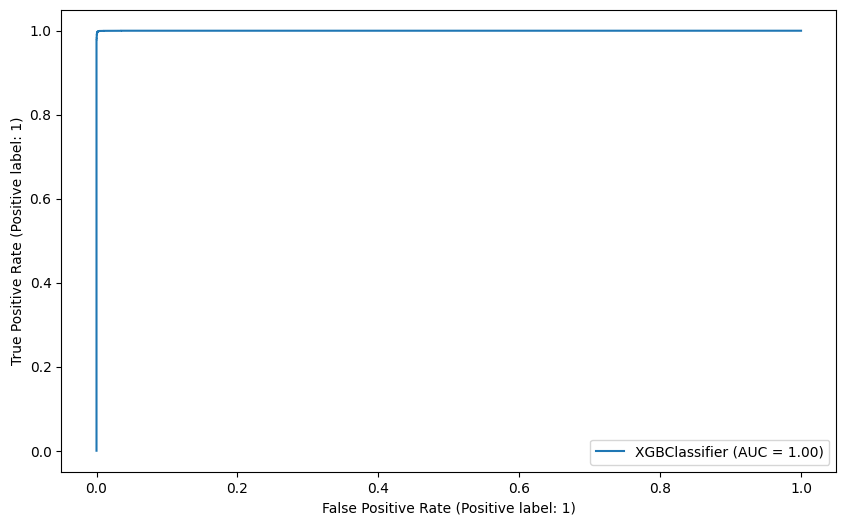

In [49]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(XGB_model, X_test, y_test);

In [50]:
eval_metric(XGB_model, X_train, y_train, X_test, y_test)

Test_Set
[[5809   19]
 [   6 6764]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5828
           1       1.00      1.00      1.00      6770

    accuracy                           1.00     12598
   macro avg       1.00      1.00      1.00     12598
weighted avg       1.00      1.00      1.00     12598


Train_Set
[[52694   108]
 [   41 60531]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     52802
           1       1.00      1.00      1.00     60572

    accuracy                           1.00    113374
   macro avg       1.00      1.00      1.00    113374
weighted avg       1.00      1.00      1.00    113374



# 7. WICHTIGKEIT DER FUNKTION

In [51]:
model = XGB_model
model.feature_importances_

feats = pd.DataFrame(index=X[columns].columns, data= model.feature_importances_, columns=['XGB_importance'])
ada_imp_feats = feats.sort_values("XGB_importance", ascending = False)
ada_imp_feats

,XGB_importance
logged_in,0.227
src_bytes,0.169
protocol_type,0.149
flag,0.104
dst_bytes,0.090
count,0.050
serror_rate,0.037
wrong_fragment,0.037
service,0.030
hot,0.027


In [52]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [53]:
y_pred_string = le.inverse_transform(y_pred)
y_pred_string

array(['normal', 'normal', 'attack', ..., 'normal', 'normal', 'attack'],
      dtype=object)

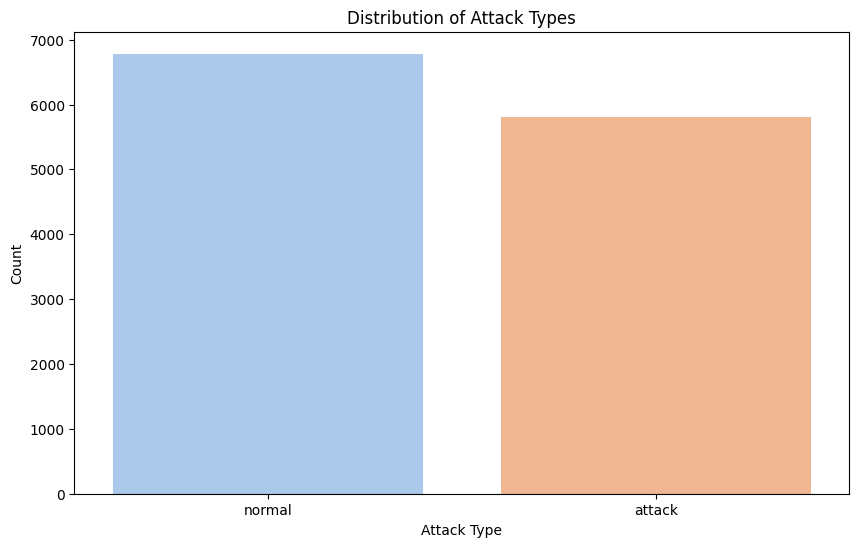

In [54]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x=y_pred_string, palette="pastel")

# Add labels and title
plt.xlabel("Attack Type")
plt.ylabel("Count")
plt.title("Distribution of Attack Types")

# Show the plot
plt.show()